## Finding best K clusters for 50 dogs Dataset  
Step 1: Create an image cordinates dictionary with image id as key and list of image width and height as value.  
Step 2: Create a bbox width dictionary, and a bbox height dictionary.  
Step 3: Divide corresponding bbox width and height with image width and height respectively to normalize the values and store the quotient's log values in different lists.  
Step 4: Plot logw Vs logh  
Step 5: Select 2 random points as cluster centers called centroids  
Step 6: Assign each data point to the closest cluster by calculating its distance with respect to each centroid  
Step 7: Determine the new cluster center by computing the average of the assigned points  
Step 8: Repeat steps 6 and 7 until none of the cluster assignments change  
Step 9: Find WCSS: the **sum of the squared distance** between each member of the cluster and its centroid. Sum((dist(Pi,Ci))^2) -- done using wcss.append(kmeans.inertia_)  
Step 10: Plot Elbow graph( No. of clusters Vs. Wcss )  
Step 11: Find optimum K.  
Step 12: Plot the final clustered graph.

In [54]:
import json
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [55]:
#opening json file
f = open('dogs_coco.json')

#open json data as a dictionary
data = json.load(f)

# step 1: create im_coord dictionary
im_coord = {}
for i in data['images']:
    key = str(i['id'])
    im_coord[key] = [i['width'],i['height']]
    
print(im_coord)

# step 2: create bbox dictionary
bbox_cord = {}
for j in data['annotations']:
    key = j['image_id']
    if key not in bbox_cord:
        bbox_cord[key] = [j['bbox'][2], j['bbox'][3]]
    else:
        bbox_cord[key].append(j['bbox'][2])
        bbox_cord[key].append(j['bbox'][3])
        
print()    
print(bbox_cord)

{'0': [400, 326], '1': [448, 336], '2': [200, 133], '3': [500, 375], '4': [200, 133], '5': [500, 375], '6': [500, 375], '7': [500, 375], '8': [500, 375], '9': [500, 333], '10': [295, 216], '11': [500, 360], '12': [482, 500], '13': [228, 224], '14': [333, 500], '15': [500, 333], '16': [500, 328], '17': [300, 213], '18': [320, 240], '19': [500, 375], '20': [320, 240], '21': [360, 270], '22': [332, 332], '23': [500, 392], '24': [432, 289], '25': [400, 397], '26': [400, 300], '27': [500, 375], '28': [500, 400], '29': [500, 375], '30': [354, 500], '31': [500, 333], '32': [368, 326], '33': [500, 375], '34': [354, 256], '35': [240, 240], '36': [338, 388], '37': [329, 480], '38': [500, 375], '39': [600, 480], '40': [500, 397], '41': [500, 354], '42': [500, 375], '43': [500, 375], '44': [500, 348], '45': [500, 375], '46': [500, 333], '47': [500, 375], '48': [227, 341], '49': [251, 300]}

{'0': [269, 293], '1': [76, 136, 85, 93, 103, 75], '2': [145, 127], '3': [411, 334], '4': [251, 184, 217, 13

In [56]:
# step 3
logw = []
logh = []
for im in im_coord:
    if(len(bbox_cord[im]) == 2):
        logw.append(math.log(bbox_cord[im][0]/im_coord[im][0]))
        logh.append(math.log(bbox_cord[im][1])/im_coord[im][1])
    if(len(bbox_cord[im]) > 2):
        l = 0
        while(l < len(bbox_cord[im])):
            if(l%2 == 0):
                logw.append(math.log(bbox_cord[im][l]/im_coord[im][0]))
                logh.append(math.log(bbox_cord[im][l+1]/im_coord[im][1]))
                
            l+=2

Text(0, 0.5, 'Normalised bbox height')

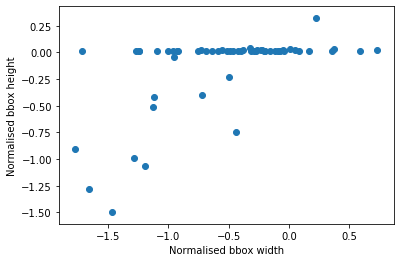

In [57]:
# step 4
plt.scatter(logw,logh)
plt.xlabel("Normalised bbox width")
plt.ylabel("Normalised bbox height")

In [58]:
X = np.column_stack((logw,logh))
print(X)

[[-0.39675317  0.01742384]
 [-1.77405989 -0.90445627]
 [-1.66214198 -1.28451167]
 [-1.47006424 -1.49962305]
 [-0.32158362  0.03642246]
 [-0.19601488  0.01549638]
 [ 0.22713557  0.32458663]
 [ 0.08157999  0.01492565]
 [-0.46203546  0.01372665]
 [-0.15782409  0.01422058]
 [-1.26584821  0.01425895]
 [-0.96233467  0.01397799]
 [-0.28768207  0.01695329]
 [ 0.00675678  0.02754927]
 [-1.00512195  0.01478614]
 [-1.28759499 -0.98886142]
 [-1.19433749 -1.06711362]
 [ 0.73607223  0.02550774]
 [ 0.16820842  0.01142747]
 [-0.68915516  0.01562765]
 [-1.2447948   0.0164301 ]
 [ 0.37615072  0.0274886 ]
 [-0.37924927  0.02205544]
 [-1.12701176 -0.51082562]
 [-1.1208579  -0.41753769]
 [-0.73136839  0.02307223]
 [-0.05129329  0.02202976]
 [-0.07503519  0.01594369]
 [-0.95191791 -0.0416727 ]
 [-0.71743987 -0.39531274]
 [-0.22488117  0.0188319 ]
 [-0.07796154  0.01386733]
 [-0.55774254  0.01783953]
 [-0.92130327  0.01481821]
 [-0.51082562  0.01517106]
 [-0.63487827  0.01455889]
 [-0.09164459  0.01140089]
 

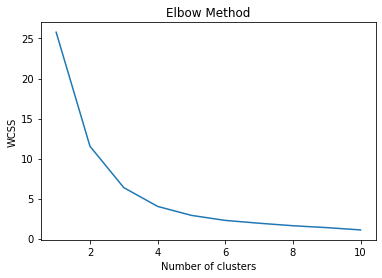

In [59]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## 3 seems to be the appropriate no. of clusters

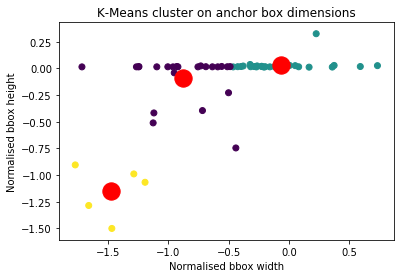

In [53]:
import seaborn as sns

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

legend = []
for i in np.unique(pred_y):
    legend.append('Cluster {0}'.format(i))
    
    
plt.scatter(X[:,0], X[:,1], c=kmeans.fit(X).labels_.astype(float))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.xlabel("Normalised bbox width")
plt.ylabel("Normalised bbox height")
plt.title("K-Means cluster on anchor box dimensions")
plt.show()

#### The large red dots represent the centroids of all clusters 